In [1]:
####   
#Fz Einfluss auf Reifenmodelle
####

import numpy as np
import matplotlib.pyplot as plt

import Pacejka52 as pa52
import TMeasy_model_Paco as tm

i=1000
Sx = np.linspace(-1,1,i)
Sy = np.linspace(-0.3,0.3,i)
Fz0 = 3114
IA = 0

iter = 1000 #
Fz = np.linspace(1500,5000,iter)


Text(0.5, 1.0, 'Fx_max vs. Fz')

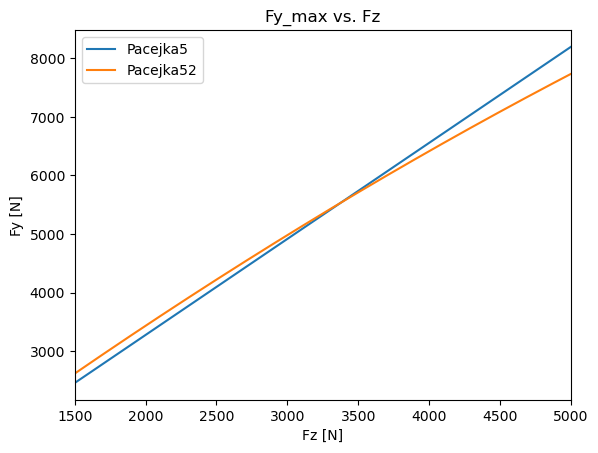

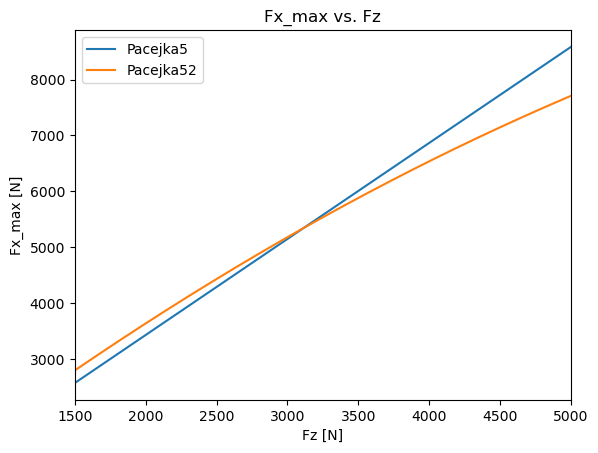

In [16]:
#Fz-Fy  , Fz -Fy


j = 0
plt.figure(1)
Fy_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka5_lat(Sy,Fz[j])
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Pacejka5")

j = 0
plt.figure(1)
Fy_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0]
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Pacejka52")

plt.xlabel("Fz [N]")
plt.ylabel("Fy [N]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Fy_max vs. Fz")

#Fx vs. Fz

j = 0
plt.figure(2)
Fx_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka5_long(Sx,Fz[j])
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Pacejka5")

j = 0
Fx_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka52_long(Fz[j],Sx,IA,Fz0)[0]
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Pacejka52")

plt.xlabel("Fz [N]")
plt.ylabel("Fx_max [N]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Fx_max vs. Fz")


0.1146


(0.1, 0.15)

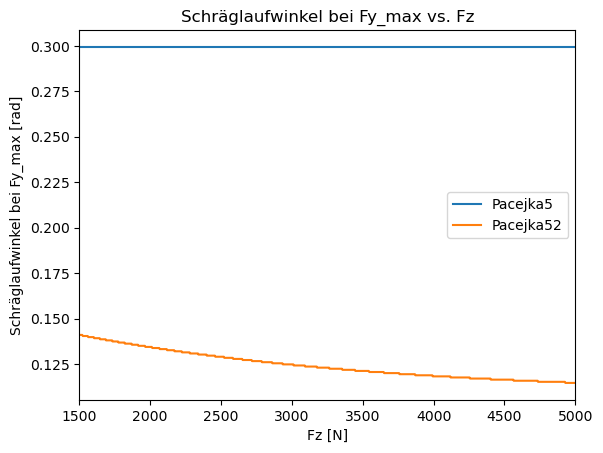

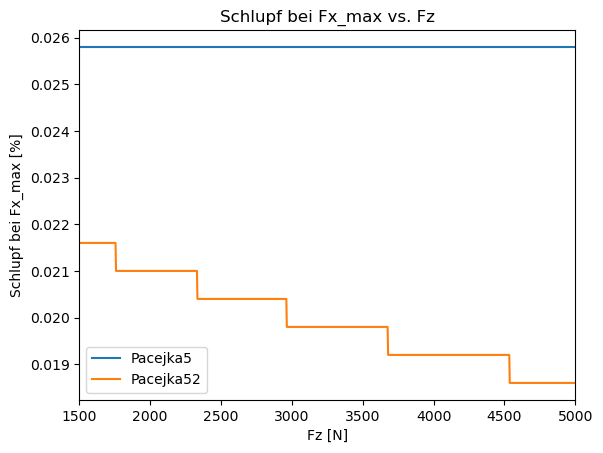

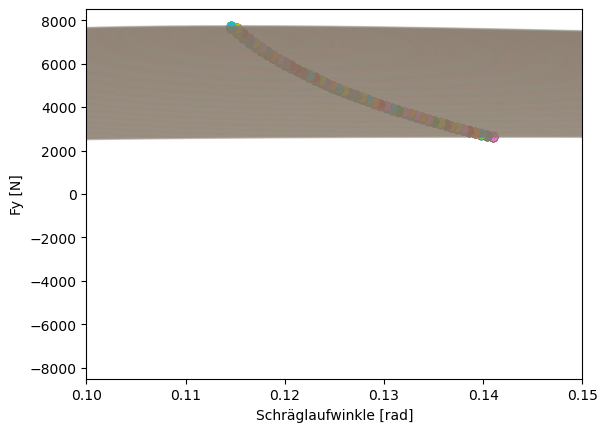

In [38]:
j = 0
plt.figure(1)
Fy_max_slip5 = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka5_lat(Sy,Fz[j])
    Fy_max_slip5[j] = (np.argmax(Fy)-(i/2)) * (0.3 / (i/2))
plt.plot(Fz,Fy_max_slip5, label = "Pacejka5")

j = 0
Fy_max_slip52 = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0]
    Fy_max_slip52[j] = (np.argmax(Fy)-(i/2)) * (0.3 / (i/2))
plt.plot(Fz,Fy_max_slip52, label = "Pacejka52")

plt.xlabel("Fz [N]")
plt.ylabel("Schräglaufwinkel bei Fy_max [rad]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Schräglaufwinkel bei Fy_max vs. Fz")

#Fx

j = 0
plt.figure(2)
Fx_max_slip5 = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka5_long(Sx,Fz[j])
    Fx_max_slip5[j] = (np.argmax(Fx)-(i/2)) * (0.3 / (i/2))
plt.plot(Fz,Fx_max_slip5, label = "Pacejka5")

j = 0
Fx_max_slip52 = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka52_long(Fz[j],Sx,IA,Fz0)[0]
    Fx_max_slip52[j] = (np.argmax(Fx)-(i/2)) * (0.3 / (i/2))
plt.plot(Fz,Fx_max_slip52, label = "Pacejka52")

plt.xlabel("Fz [N]")
plt.ylabel("Schlupf bei Fx_max [%]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Schlupf bei Fx_max vs. Fz")

plt.figure(3)
j=0
for j in range(0, len(Fz)):
    Fy = pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0]
    plt.plot(Sy,Fy, alpha = 0.1)
    max = (np.argmax(Fy)-(i/2)) * (0.3 / (i/2))
    y=np.max(Fy)
    plt.scatter(max,y)

plt.xlabel("Schräglaufwinkle [rad]")
plt.ylabel("Fy [N]")
plt.xlim(0.1,0.15)


0.1146


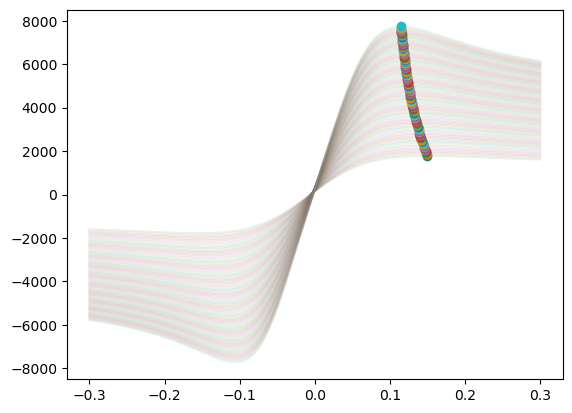